In [7]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pylab as plt


In [193]:
#For CSV files
inaData = pd.read_csv('ina2192019-08-23-1566579742.csv').fillna(0)

In [194]:
print(inaData.shape)
inaData.head()

(1827, 3)


,mA,V,time
0,493.5,4.596,1.566580e+09
1,493.9,4.596,1.566580e+09
2,493.3,4.596,1.566580e+09
3,492.8,4.596,1.566580e+09
4,493.8,4.596,1.566580e+09


In [195]:
#add power
type(inaData)

pandas.core.frame.DataFrame

In [196]:
inaData.insert(2, 'watts', (inaData.mA / 1000.0) * inaData.V, True)

In [197]:
inaData.head()

,mA,V,watts,time
0,493.5,4.596,2.268126,1.566580e+09
1,493.9,4.596,2.269964,1.566580e+09
2,493.3,4.596,2.267207,1.566580e+09
3,492.8,4.596,2.264909,1.566580e+09
4,493.8,4.596,2.269505,1.566580e+09


In [198]:
#averages per second

inaLength = inaData.shape[0]
inaStartTime = inaData.time[0]
inaEndTime = inaData.time[inaData.shape[0]-1]
inaTimePeriod = inaEndTime - inaStartTime
dataPerSecond =inaLength/inaTimePeriod

dataPerSecond


15.228275409163972

In [211]:
averagedINA = pd.DataFrame(columns=['mA','V','watts','time'])

for av in list(range(int(inaTimePeriod))):
    avmA= inaData.loc[(15*av):((15*av)+14)]['mA'].sum()/15
    avV = inaData.loc[(15*av):((15*av)+14)]['V'].sum()/15
    avWatts = inaData.loc[(15*av):((15*av)+14)]['watts'].sum()/15
    avTime = inaData.loc[(15*av):(15*av)]['time'][inaData.loc[(15*av):(15*av)]['time'].index[0]]
    averagedINA = averagedINA.append({'mA' : avmA , 'V' : avV, 'watts': avWatts,'time': avTime},ignore_index=True)

    

In [212]:
print averagedINA.shape
averagedINA.head()

(119, 4)


,mA,V,watts,time
0,493.420000,4.596,2.267758,1.566580e+09
1,493.200000,4.596,2.266747,1.566580e+09
2,493.860000,4.596,2.269781,1.566580e+09
3,495.213333,4.596,2.276000,1.566580e+09
4,546.493333,4.596,2.511683,1.566580e+09


In [136]:
seleniumData = pd.read_csv('selenium-2019-08-23-1566579749.csv').fillna(0)


In [137]:
print(seleniumData.shape)
seleniumData.tail()

(73, 2)


,task,time
68,click,1.566580e+09
69,click,1.566580e+09
70,click,1.566580e+09
71,click,1.566580e+09
72,stop static,1.566580e+09


In [140]:
startTimeD = seleniumData.loc[seleniumData.loc[:,'task']=='start dynamic']
stopTimeD = seleniumData.loc[seleniumData.loc[:,'task']=='stop dynamic']

startTimeS = seleniumData.loc[seleniumData.loc[:,'task']=='start static']
stopTimeS = seleniumData.loc[seleniumData.loc[:,'task']=='stop static']

In [141]:
print startTimeD
print stopTimeD
print startTimeS
print stopTimeS

            task          time
0  start dynamic  1.566580e+09
            task          time
36  stop dynamic  1.566580e+09
            task          time
37  start static  1.566580e+09
           task          time
72  stop static  1.566580e+09


In [216]:
#make new data frame with power date from only test duration
inaTestDataD = averagedINA.loc[(averagedINA.loc[:,'time']>=startTimeD.time[0]) & (averagedINA.loc[:,'time']<=stopTimeD.time[36])]
#inaTestData2 = inaTestData.loc[inaTestData.loc[:,'time']<stopTime.time[49]]
inaTestDataD.shape

(25, 4)

In [217]:
#make new data frame with power date from only test duration
inaTestDataS = averagedINA.loc[(averagedINA.loc[:,'time']>=startTimeS.time[37]) & (averagedINA.loc[:,'time']<=stopTimeS.time[72])]
#inaTestData2 = inaTestData.loc[inaTestData.loc[:,'time']<stopTime.time[49]]
inaTestDataS.shape

(24, 4)

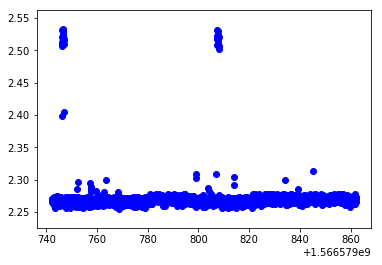

In [218]:

#graph all data
plt.scatter(x=inaData.loc[:,'time'], y=inaData.loc[:,'watts'], color='b')


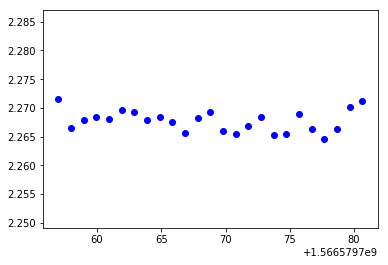

In [219]:
#graph dynamic data
plt.scatter(x=inaTestDataD.loc[:,'time'], y=inaTestDataD.loc[:,'watts'], color='b')


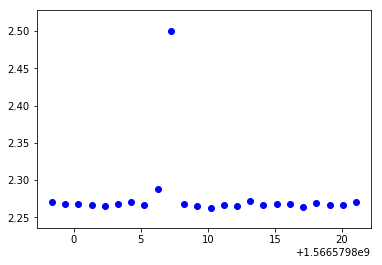

In [220]:
#graph static data
plt.scatter(x=inaTestDataS.loc[:,'time'], y=inaTestDataS.loc[:,'watts'], color='b')


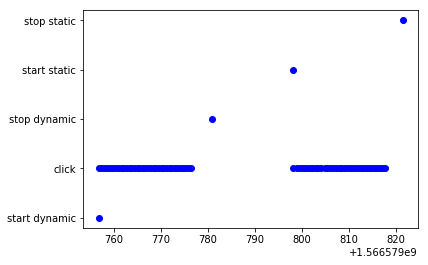

In [221]:

# a graph of volume of project start dates by year
plt.scatter(x=seleniumData.loc[:,'time'], y=seleniumData.loc[:,'task'], color='b')

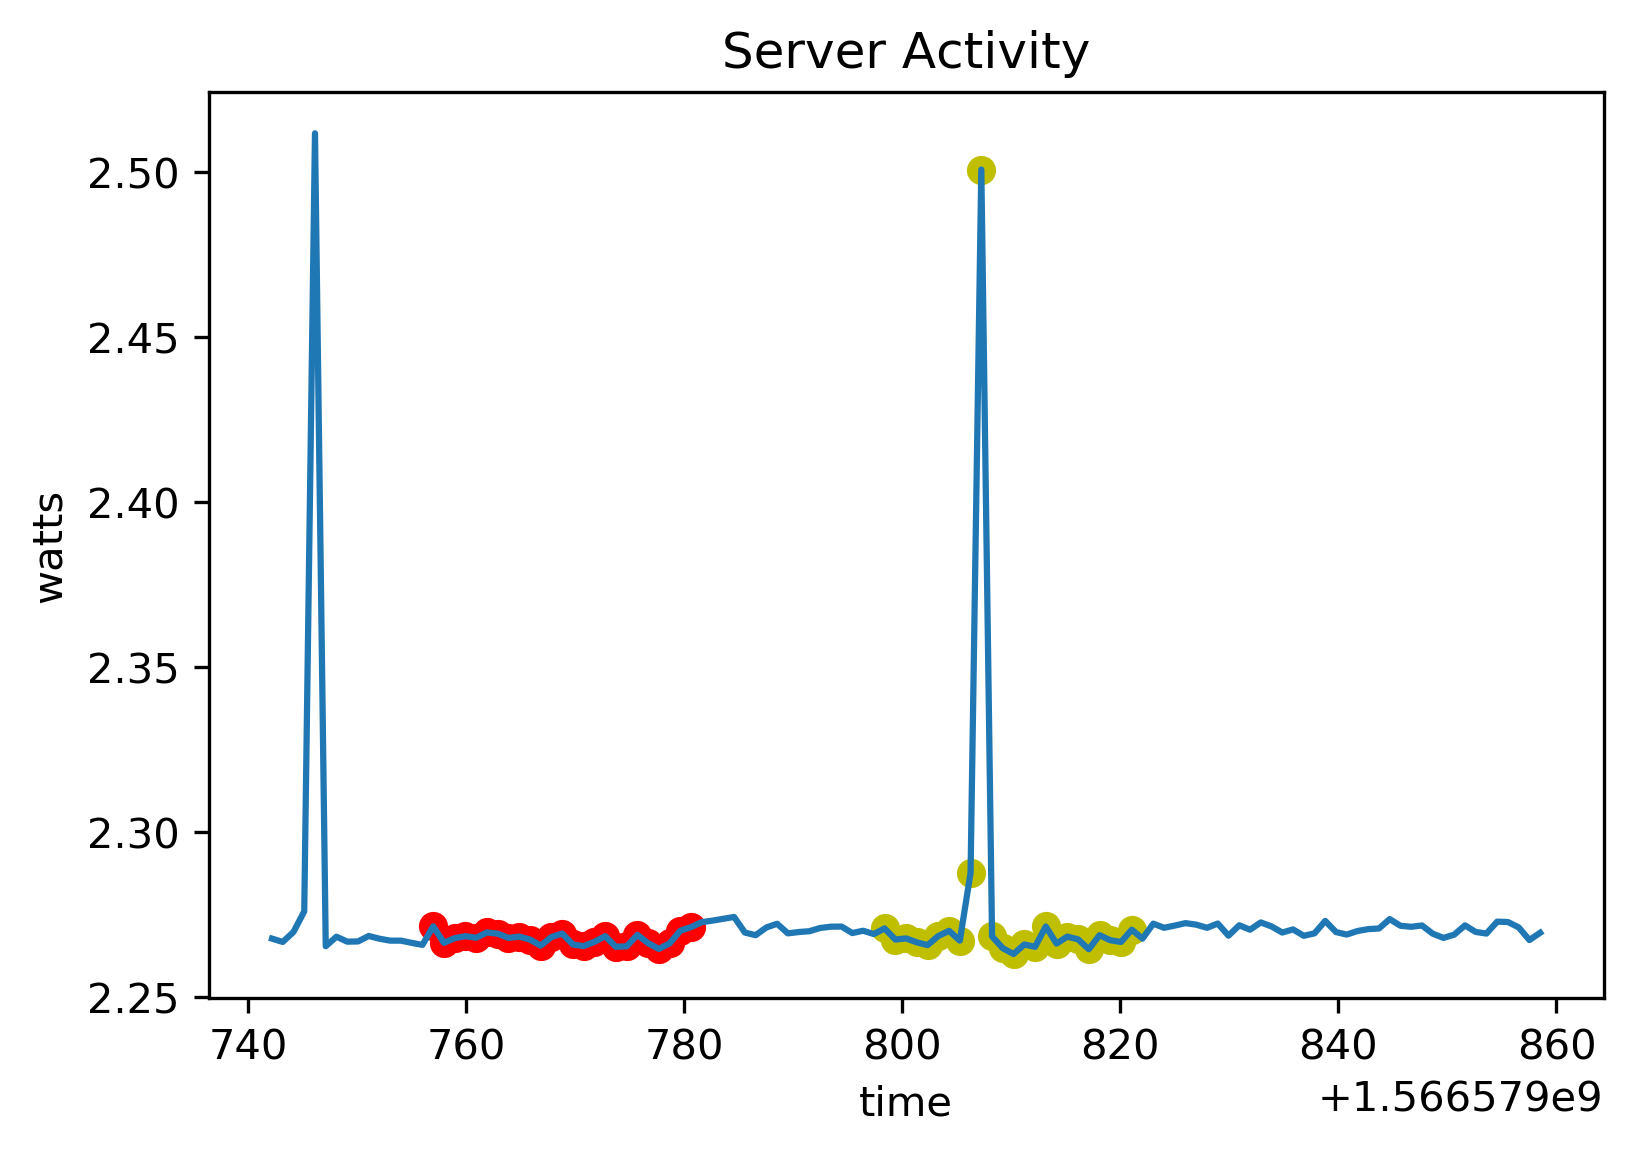

In [226]:
fig, ax = plt.subplots(dpi=300)

x = averagedINA.loc[:,'time']
y = averagedINA.loc[:,'watts']
ax.plot(x,y)

ax.set(xlabel='time', ylabel='watts',
       title='Server Activity')

ax.scatter(x=inaTestDataD.loc[:,'time'], y=inaTestDataD.loc[:,'watts'], color='r')
ax.scatter(x=inaTestDataS.loc[:,'time'], y=inaTestDataS.loc[:,'watts'], color='y')

#ax.grid()

fig.savefig("aggregatoroutput_aug23.png")
plt.show()